# Проверка гипотез и доверительные интервалы

### Тестирование гипотез
$H_0$ нулевая гипотеза против альтернативной

![](https://github.com/SchattenGenie/hse-stats-course-2019/blob/master/seminar-notes/03_tests/stat_errors.png)

В статистике различаются два вида ошибок:
  * $\alpha$ - ошибка первого рода -- когда мы отвергаем гипотезу, а она верна;
  * $\beta$ - ошибка второго рода -- когда мы __не__ отвергаем гипотезу, а она не верна.
    (т.е. неверно приняли приняли нулевую гипотезу)
  
  
![](https://openlab-flowers.inria.fr/uploads/default/original/2X/7/703b9d4e3037b266e8fc6b20e020eb84d4405a80.png)


$$p\mathrm{-value} = 1 - \int\limits_{-\infty}^{t_{\alpha}} p_{H_0}(t) dt$$



Статистический тест:


При n стремящейся к бесконечности по Центральной предельной теореме можно получить, что:

$\frac{\bar X -\mu}{\sigma/\sqrt{n}} \sim 𝒩(0,1)$

Отсюда, при известной $\sigma$, можно получить доверительный интервал на $\mu$:

Так как  $P(\frac{\bar X -\mu}{\sigma/\sqrt{n}} \leq k)=\Phi_{𝒩(0,1)}(k)$,
с вероятностью $\alpha$  $\mu$ будет лежать в (1- $\alpha$)% интервале:
 $$ -z_{\frac{\alpha}{2}} \leq \frac{\bar X -\mu}{\sigma/\sqrt{n}} \leq z_{\frac{\alpha}{2}}$$

 Откуда  $ \bar X- \frac{\sigma}{\sqrt{n}} z_{\frac{\alpha}{2}}  \leq \mu \leq   \bar X+ \frac{\sigma}{\sqrt{n}} z_{\frac{\alpha}{2}}$

или составить статистический тест на $\mu$:

$H_0: \mu = \mu_0$


$P(\frac{\bar X -\mu_0}{\sigma/\sqrt{n}} \leq x)=\Phi_{𝒩(0,1)}(x)$

Посчитав $\Phi_{𝒩(0,1)}(\frac{\bar X -\mu_0}{\sigma/\sqrt{n}} )$, мы смотрим насколько экстремально получить такие данные при нулевой гипотезе.



##Задача 0: равенство средних
 Доверительный интервал и как связано с проверкой гипотез




На заводе работают три станка типа А и два станка типа В. Еженедельные затраты на ремонт машин типа А обычно распределяются со средним значением $\mu_1$ и отклонением $\sigma$. Еженедельные затраты на ремонт машин типа В также распределяются нормально, но со средним значением $\mu_{2}$ и отклонением $\sigma$?.  Если вам
дана случайная выборка, $X_1 = 100,X_2 = 120, X_3 =
95$ по затратам на машины типа А и независимой
случайной выборке $Y_1 = 120, Y_2 = 180$ по затратам на машины типа
B.



 Рассчитайте 95%-ный доверительный интервал для разницы стоимости ремонта в неделю, $\mu_1 - \mu_2$.


 Проверьте гипотезу с уровнем значимости 95%,что  ожидаемой стоимость ремонта в неделю, $\mu_1 - \mu_2$ равна 0.

### Решение Задачи 0:

Составим статистику.

Исходя из того, что
затраты на ремонт машин распределены нормально
$X_i \sim  𝒩(\mu_1,\sigma^{2})$

$ Y_i \sim  𝒩(\mu_2,\sigma^{2})$


Отсюда
$(\frac{ \bar X - \mu_1}{\sigma/\sqrt{3}})\sim 𝒩(0,1)$ и
$(\frac{\bar Y - \mu_2}{\sigma/\sqrt{2}}) \sim 𝒩(0,1)$


$(\frac{ \bar X - \mu_1}{\sigma/\sqrt{3}}) \frac{1}{\sqrt{3}}- (\frac{\bar Y - \mu_2}{\sigma/\sqrt{2}}) \frac{1}{\sqrt{2}}    = \frac{ \bar X -  \mu_1  - \bar Y + \mu_2} {\sigma}\sim   𝒩(0,\sqrt{\frac{1}{3}+\frac{1}{2}})$


Unknown $\sigma$

По лемме Фишера:
$\frac{(n_x-1)s_x^{2}}{\sigma^{2}}\sim χ^{2}(n_x-1)$
$\frac{(n_y-1)s_y^{2}}{\sigma^{2}}\sim χ^{2}(n_y-1)$

Thus, $\frac{(n_x-1)s_x^{2}+(n_y-1)s_y^{2}}{\sigma^{2}} \sim χ^{2}(n_x+n_y-2) $

По определению распределения Стьюдента
$\frac{\bar X - \mu_1  - \bar Y + \mu_2 }{\sqrt{\frac{(n_x-1)s_x^{2} + (n_y-1)s_y^{2}}{n_y+n_x-2}}\sqrt{\frac{1}{n_x}+ \frac{1}{n_y}}} \sim \frac{N(0,1)}{\sqrt{χ^{2}(n_x+n_y-2)}} \sim t(n_x+n_y-2)$

Интервал:

CI: $\bar X - \bar Y ± t_{\frac{\alpha}{2}}(n_x+n_y-2) \sqrt{\frac{(n_x-1)s_x^{2} + (n_y-1)s_y^{2}}{n_y+n_x-2}}\sqrt{\frac{1}{n_x}+ \frac{1}{n_y}}$

In [ ]:
import numpy as np
from scipy.stats import t
X = np.array([120,100, 95])
Y = np.array([120, 140])
n_x = len(X)
n_y = len(Y)
X_bar = np.mean(X)
Y_bar = np.mean(Y)
s_X = np.std(X)
s_Y = np.std(Y)
t_quantile = t.isf(df = n_x+ n_y-2, q = 0.0025)
t_lower = (X_bar - Y_bar) - t_quantile*np.sqrt(((n_x-1)*(s_X**2) + (n_y-1)*(s_Y**2))*(n_x+n_y)/ (n_x*n_y*(n_x+n_y - 2)))
t_upper = (X_bar - Y_bar) + t_quantile*np.sqrt(((n_x-1)*(s_X**2) + (n_y-1)*(s_Y**2))*(n_x+n_y)/ (n_x*n_y*(n_x+n_y - 2)))
print("CI 95% :", t_lower , t_upper )


CI 95% : -96.7195907550775 46.719590755077505


Так как ноль входит в интервал, не можем отвергать нулевую гипотезу с уровнем значимости 5%.

## Мотивационные вопросы

Зачем нужны доверительные интервалы? Как их можно применить в машинном обучении?

Вместо точечныз оценок как интервалы уверенности, можно несколько интервалов строить для разного уровня значимости.

### Доверительные интервалы

Точечные оценки, которые мы обсуждали ранее (выборочные средние, ММП-оценки,...) работают так:
$$
\text{выборка} \mapsto T, \text{число}.
$$
Это хорошо, но при этом мы не можем, например, понять, насколько оценка устойчивая, то есть, не получится ли так, что мы получим другую выборку из того же распределения и оценка станет совсем другой. Иными словами не ясно, насколько мы уверенно можем заявить, что истинный параметр действительно близко к полученному значению.

Доверительные интервалы -- это следующая ступень. Теперь вместо точечной оценки мы хотим интервал, который с заданной вероятностью включал бы в себя истинный оцениваемый параметр:
$$
\text{выборка} \mapsto L,R.
$$

Пока очень общо, формализуем такой подход. Пусть нам дана выборка $X_1,..,X_n$, зададим произвольное $\alpha \in (0,1)$. Доверительным интервалом уровня $1-\alpha$ для истинного параметра $\theta$ мы будем называть интервал со случайными(!!!) концами $L,R$ такой, что
1. $L,R$ -- статистики (по-другому, оценки) и при этом c вероятностью $1$ граница $ L < R$;
2. Вероятность накрытия интервалом истинного значения параметра $\theta$ равна
$$
\mathbb{P}(L< \theta <R) = 1-\alpha.
$$

А тестирование гипотез - это насколько правдоподобны наши данные нашей гипотезе

## Задача 1 (Жизненная проверка гипотез)

В кофейне Арбуз после начала нового сезона решили попробовать открыть продажу пирожных. По итогам месяца посчитали, что было продано $250$ бисквитных с орехами, $100$ бисквитных с заварным кремом и $450$ стаканов орешков со сгущёнкой. Известно, что все проданные пирожные были проданы отдельно, так как оказалось, что клиенты покупали их вместе с напитком и не хотели брать второе пирожное.

* Постройте ММП-оценку для вероятности выбора клиентом каждого из пирожных;
* Постройте асимптотический доверительный интервал для вероятности продажи пирожного с орехами или заварным кремом;
* Проверьте гипотезу о том, что клиент покупает орешки со сгущёнкой с вероятностью $0.5$ на уровне значимости $\alpha=0.05$, используя центральную предельную теорему.


### Решение

ММП-оценку можно построить разными способами, например, можно выписать функцию правдоподобия, взять логарифм и промаксимизировать. В данном случае мы можем предложить вероятностную модель с дискретным распределением: пусть клиент покупает бисквитное пирожное с орехами с вероятностью $p_1$, бисквитное с кремом с вероятностью $p_2$, а орешки со сгущёнкой уходят с вероятностью $1-p_1-p_2$. Логарифмическая функция правдоподобия в данном случае будет иметь вид
$
l(p_1,p_2) = 250\ln p_1 + 100 \ln p_2 + 450 \ln(1-p_1-p_2).
$

Попробуем промаксимизировать её, приравняв производные к нулю; решая, получим
$\hat{p}_1= 5/16,~ \hat{p}_2=1/8,~ 1-\hat{p}_1-\hat{p}_2 = 9/16.
$


Теперь рассмотрим второй вопрос. Говоря ``асимптотический'', мы имеем в виду, что в качестве одного из вариантов можно задействовать центральную предельную теорему. Классическая версия говорит, что если случайные величины $X_1,..,X_n,..$ независимы и одинаково распределены с конечным матожиданием $\mu$ и дисперсией $\sigma^2$, то при $n \to \infty$
$\frac{\sqrt{n}(\overline{X}_n - \mu)}{\sigma} \to^d \mathcal{N}(0,1),$

где $\overline{X}_n:=\frac{1}{n}\sum_{i=1}^n X_i$ -- выборочное среденее. В нашем случае мы можем применить теорему Слуцкого,  помощью которой можно заменить настоящую дисперсию на выборочную  $\hat{\sigma}^2$ и получить тот же результат. Таким образом, имея достаточно большую выборку мы можем утверждать, что распределение статистики выше недалеко от $\mathcal{N}(0,1)$ и в качестве доверительного интервала мы можем использовать квантили $z_\alpha$ стандартного нормального распределения с нужным уровнем $\alpha$. В нашем случае в качестве $X$ нам нужно взять случайную величину с рапределением $Ber(p_1+p_2)$ и, соответственно, $\overline{X}_n= \hat{p}_1+\hat{p}_2$. Получаем, что

$P({z_{\alpha/2} \leq \frac{ \sqrt{n}(\hat{p}_1+\hat{p}_2 - p_1-p_2) }{ \hat{\sigma} } \leq z_{1-\alpha/2}}) \approx 1-\alpha,$
в итоге

$P\left(-\frac{\hat{\sigma}}{\sqrt{n}}z_{1-\alpha/2} + \hat{p}_1+\hat{p}_2 \leq    p_1+p_2  \leq  \hat{p}_1+\hat{p}_2 +\frac{\hat{\sigma}}{\sqrt{n}} z_{1-\alpha/2} \right) \approx 1-\alpha.$


Наконец, мы можем использовать этот доверительный интервал для проверки гипотезы на уровне значимости $\alpha$ (вероятность отвергнуть верную гипотезу!). Проверяем гипотезу $H_0: p_1+p_2=0.5$ против альтернативы $H_1: p_1+p_2 \neq 0.5$. Для теста используем статистику

$
T= \frac{ \sqrt{n}(\hat{p}_1+\hat{p}_2 - p_1-p_2) }{ \sigma },
$

про которую у нас есть классическая центральная предельная теорема, утверждающая, что при верной гипотезе $T$ близка к гауссовской случайной величине при большой выборке. Заметьте, что $p_1+p_2=0.5$ задано гипотезой, а значит, и $\sigma = \sqrt{(p_1+p_2)(1-p_1-p_2)}=0.5$. Если статистика на нашей выборке не попадает в доверительный интервал уровня $1-\alpha$ (как выше), то гипотеза отвергается; иначе тест не может её отвергнуть.

В данном случае значение статистики $\hat{T}=2\sqrt{800}(7/16 - 0.5)=-5\sqrt{2}/2\approx -3.54$ и это точно меньше квантили $z_{\alpha/2}=-1.96$. Таким образом, гипотеза отвергается.

### Про p-value

На практике в силу доступности компьютера обычно не сверяются с квантилями по таблице, как это делали в середине прошлого века. Вместо этого для данной выборки считают так называемый p-value.

Можно заметить, что если мы будем задавать $\alpha$ очень малым (тем самым панически боясь отвергнуть гипотезу), то доверительная область будет расширяться (и в конце концов при $\alpha=0$ мы придём к тому, что доверительная область -- вся прямая и мы не отвергаем гипотезу никогда). С другой стороны, увеличивая уровень значимости $\alpha$, мы разрешаем допустить ошибку при отвержении с большей вероятностью (тем самым агрессивно желая отвергнуть гипотезу) и доверительная область будет уменьшаться (в экстремальном случае $\alpha=1$ мы отвергнем гипотезу в любом случае, кроме (а вдруг, но с вероятностью 0) случая $\hat{T}=0$).  Естественно, что если мы зафиксируем значение статистики $\hat{T}$ (при уже заданной выборке оно вычисляется) и будем менять только $\alpha$, будет какой-то пороговый уровень $\alpha_{pv}$, при котором происходит переход от доверия гипотезе к её отвержению. Это и есть p-value -- максимальный уровень значимости $\alpha_{pv}$, при котором гипотеза не отвергается (либо, что то же, минимальный, при котором она отвергнется).

Так, смотря на посчитанный один раз p-value, можно для любого заданного уровня значимости сказать сразу: отвергаем гипотезу или нет. Тем не менее, очень полезно понимать, как этот инструментарий работает с точки зрения общей науки, так как для подсчёта $p-value$, который вводится не очень очевидно на первый взгляд, ужё гарантированно придётся задействовать компьютер.

## Задача 2 (Равенство дисперсий многомерного нормального распределения)

Пусть даны $X_1,..,X_{15}$, независимые и одинаково распределённые случайные вектора в $R^{10}$ из распределения $\mathcal{N}(0, \sigma^2 I)$. Постройте критерий для проверки гипотезы $\sigma^2=\sigma_0^2$ против альтернативы $\sigma^2 > \sigma_0^2$.

### Решение

Это один из естественных примеров, когда нужен односторонний критерий. \\

Величины $X_1,..,X_{15}$ -- независимые гауссовские вектора. Более того, координаты векторов некоррелированы, так как ковариационная матрица диагональна. Если мы запишем матрицу
$(X_{i,j}) = \begin{bmatrix} X_1 \vert & .. & \vert X_{15}\end{bmatrix},$
то её ячейки будут независимы в совокупности и распределены по $\mathcal{N}(0,\sigma^2)$.

Как нам известно, сумма квадратов координат $k$-мерного нормального вектора из $\mathcal{N}(0,I)$ имеет распределение хи-квадрат с $k$ степенями свободы ( $\chi^2(k)$, это одно из определений распределения хи-квадрат). Так,

$T=\sum_{i=1}^{10}\sum_{j=1}^{15} \frac{X_{i,j}^2}{\sigma^2} \sim \chi^2 (150).$

Для проверки гипотезы можем использовать следующий способ. Проверяем гипотезу $H_0: \sigma^2=\sigma_0^2$ против альтернативы $H_1: \sigma^2 > \sigma_0^2$. Зная, что статистика $T$ при верной гипотезы будет иметь распределение как выше и посчитав по данной выборке $\hat{T}$, мы отвергаем гипотезу при $\hat{T}>\lambda_{1-\alpha}$, где $\lambda_{1-\alpha}$ -- квантиль распределения $\chi^2(150)$ уровня $1-\alpha$.

Почему именно так? Вероятность получить значения больше $\lambda_{1-\alpha}$ (и, значит, отвергнуть верную гипотезу!) в предположении того, что гипотеза верна, как раз равна $\alpha$, уровню значимости.



## Задача 3 (Гипотеза об однородности)

$\chi^2$-тест об однородности гипотеза





### Постановка задачи

|  . | Мужчин | Женщин  | Всего  |
|---|---|---|---|
| Контрольная группа  | 8  |  7 |  15 |
| Инсульт  |  14 |  1 |  15 |
|  Всего  |  22 | 8  | 30  |

Мы тестируем гипотезу:

$$\mathbb{H}_0:~~\textrm{Пропорции мужчин и женщин в каждой группе равны(независимы от пола)}$$  $$~~\mathrm{vs}~~$$  $$\mathbb{H}_1: ~~ \textrm{не равны}$$

Тест считает все возможные способы разбросать 30 наблюдений по таблице 2 x 2 с такими же суммами по строкам и столбцам и с такими же пропорциями, как в таблице выше.

In [ ]:
import numpy as np

con_m, con_f = 8, 7
str_m, str_f = 14, 1

design_matrix = np.array([[con_m, con_f], [str_m, str_f]])

### $\chi^2$-тест

$$\chi^2 = \sum\limits_{i,j} \frac{(E_{ij} - O_{ij})^2}{E_{ij}},$$

где $O_{ij}$ - число в ячейке $ij$, $E_{ij}$ - математическое ожидание числа наблюдений при нулевой гипотезе.

Тест из scipy.stats

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(design_matrix, correction=False)

print('Chi2 test: {:.4f}'.format(chi2))
print('Chi2 test p-value: {:.4f}'.format(p))

Chi2 test: 6.1364
Chi2 test p-value: 0.0132


$\chi^2$-тест своими руками

In [ ]:
E = (np.outer(design_matrix.sum(axis=1), design_matrix.sum(axis=0)) / 30)
print(E)
chi2_test = ((np.abs(E - design_matrix))**2 / E).sum()
print("Хи-квадрат:", chi2_test)

from scipy.stats import chi2
print("p-value:", 1 - chi2.cdf(((np.abs(E - design_matrix))**2 / E).sum(), df=1))


[[11.  4.]
 [11.  4.]]
Хи-квадрат: 6.136363636363637
p-value: 0.013242937567462088


## Задача 4 (Тест Колмогорова Смирнова)

На лекции упоминалось, что для ответа на вопрос "Пришли ли две выборки из одного и того же распределения?" нам может помочь критерий Колмогорова-Смирнова. Давайте разберёмся с ним чуть поподробнее

Пусть даны две несвязанных выборки $X_1,..,X_n$ и $Y_1,..,Y_m$, независимые в совокупности внутри и между собой и каждая из распределений $F$ и $G$ соответственно. Если мы сразу попробовали бы поставить гипотезу и альтернативу, вероятно, они бы выглядели так:

$$
H_0: \forall x ~F(x)=G(x)$$
$$~H_A: \exists x ~F(x) \neq G(x).
$$

Чтобы проверить такую гипотезу с помощью теста Колмогорова-Смирнова, нам необходимо построить эмпирическую функцию распределения обеих выборок и вычислить следующую статистику:

$$d	   =    	max[abs[{F_{n}(X)-G_{m}(X)}]]$$

Чтобы узнать, как считается p-value для такой гипотезы, можно обратиться к следующей литературе
* [Вопрос на stackexchange](https://stats.stackexchange.com/questions/149595/ks-test-how-is-the-p-value-calculated)
* [Статья, где выводится ответ](http://www.jstatsoft.org/v08/i18/paper?ev=pub_ext_btn_xdl)

Допустим, у нас есть следующие 2 выборки:

```
X : 1, 2, 2.5, 3, 4, 4.5, 9.5, 18, 22, 23
Y : 5, 6, 7, 8, 9, 10, 10, 19, 20, 21, 22
```

Тогда совокупная эмпирическая функция распределения для выборок будет выглядеть следующим образом:
```    
   1.0 2.0 2.5 3.0 4.0 4.5 5.0 6.0 7.0 8.0 9.0 9.5 10. 18. 19. 20. 21. 22. 23.
Fx 0.1 0.2 0.3 0.4 0.5 0.6 0.6 0.6 0.6 0.6 0.6 0.7 0.7 0.8 0.8 0.8 0.8 0.9 1.0
Fy 0.0 0.0 0.0 0.0 0.0 0.0 0.1 .19 .28 .37 .46 .46 .64 .64 .73 .82 .91 1.0 1.0

```

Методом пристального взгляда видим, что максимальная разница между функциями распределения достигается в точке 4.5 и составляет 0.6. Уже интуитивно понятно, что столь большое различие в функциях распределения в определённой точке вряд ли позволит нам не отвергнуть гипотезу об однородности этих распределений.

Посчитаем критическое значение статистики для 95% доверительного интервала:

$$d(0.05) = 1.36\sqrt{1/n + 1/m} = 1.36\sqrt{1/11 + 1/10} =  0.594$$

Видим, что наблюдаемое значение статистики 0.6 больше критического значения для двухсторонней гипотезы, поэтому гипотеза об однородности действительно отвергается.

In [ ]:
import numpy as np
from scipy import stats

X = np.array([1, 2, 2.5, 3, 4, 4.5, 9.5, 18, 22, 23])
Y = np.array([5, 6, 7, 8, 9, 10, 10, 19, 20, 21, 22])
stats.ks_2samp(X, Y)

KstestResult(statistic=0.6, pvalue=0.033936651583710405, statistic_location=4.5, statistic_sign=1)

In [ ]:
sum(X<=stats.ks_2samp(X, Y).statistic_location)/len(X)

0.6

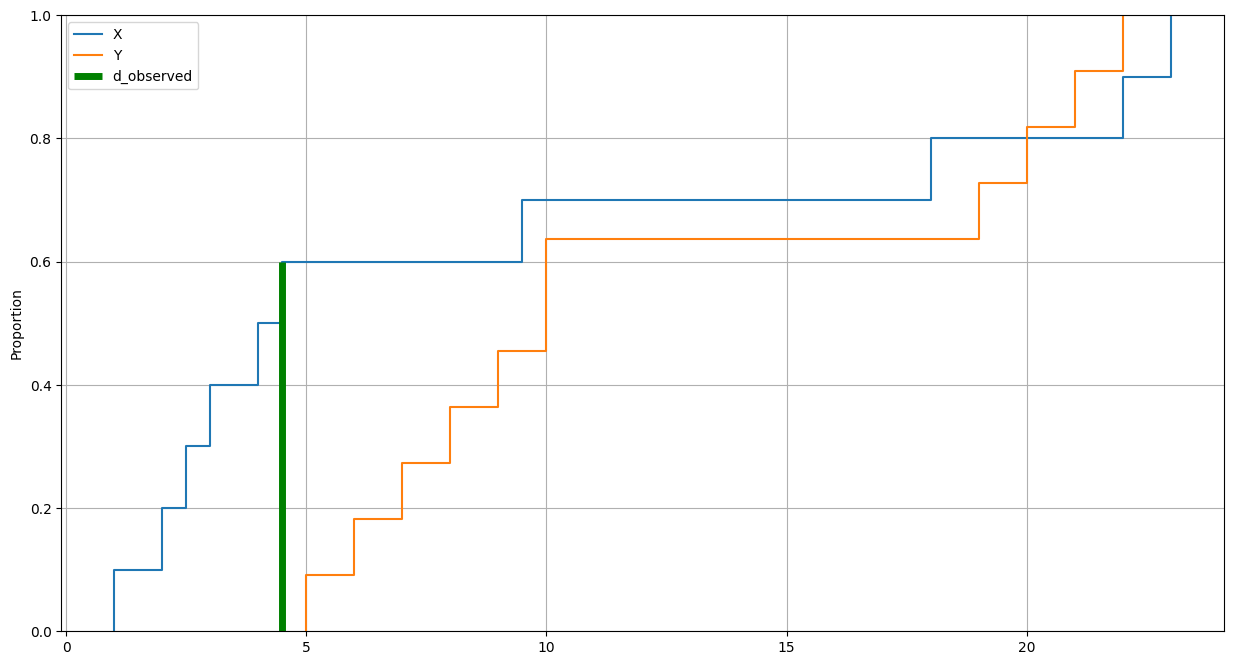

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
ax_X = sns.ecdfplot(X, label='X')
ax_Y = sns.ecdfplot(Y, label='Y')

try:
  critical_y = sum(Y<=stats.ks_2samp(X, Y).statistic_location)/len(Y)
except:
  critical_y = 0

try:
  critical_x = sum(X<=stats.ks_2samp(X, Y).statistic_location)/len(X)
except:
  critical_x = 0

plt.vlines(stats.ks_2samp(X, Y).statistic_location,
           ymin=min(critical_y, critical_x),
           ymax=max(critical_y, critical_x),
           color='g', label='d_observed', linewidth=5)
plt.grid()
plt.legend()
plt.show()

### Небольшое интро в расстояние Вассерштейна

* [Вики](https://en.wikipedia.org/wiki/Wasserstein_metric)
* [Пример расчёта](https://www.fabriziomusacchio.com/blog/2023-07-24-wasserstein_distance_cdf_approximation/)

In [ ]:
import matplotlib.pyplot as plt
import seaborn  as sns

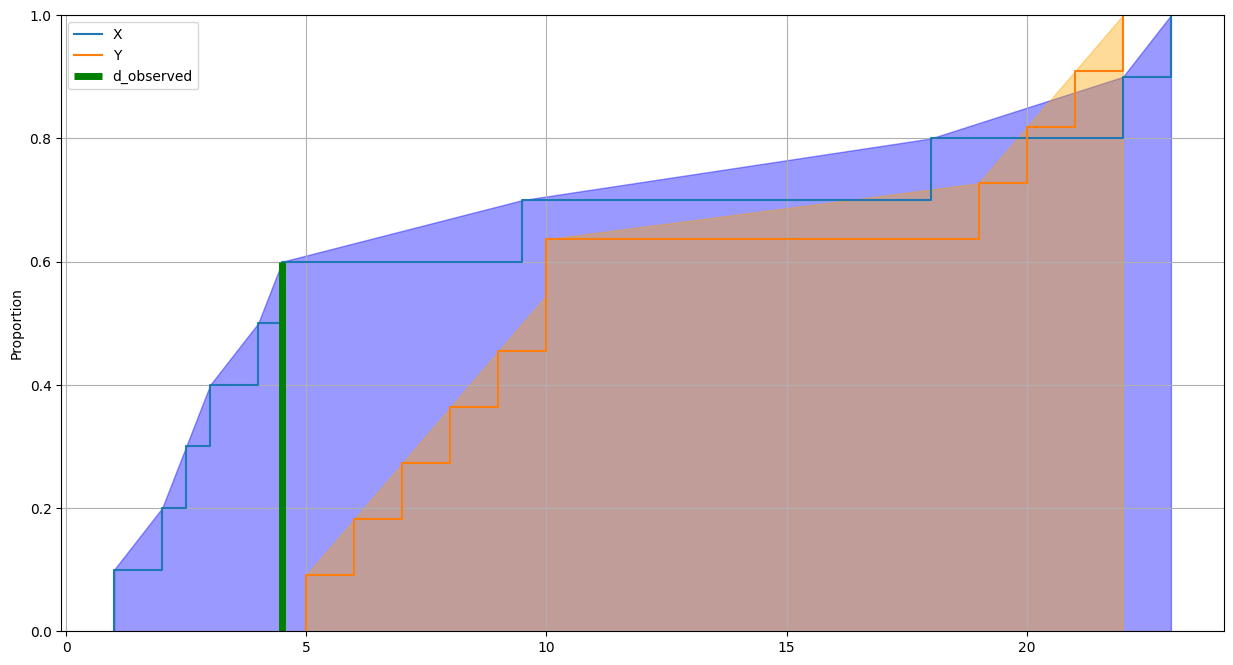

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.ecdfplot(X, label='X')
ax = sns.ecdfplot(Y, label='Y')

plt.vlines(stats.ks_2samp(X, Y).statistic_location,
           ymin=min(critical_y, critical_x),
           ymax=max(critical_y, critical_x),
           color='g', label='d_observed', linewidth=5)

x1 = ax.lines[0].get_xydata()[:,0]
y1 = ax.lines[0].get_xydata()[:,1]
x2 = ax.lines[1].get_xydata()[:,0]
y2 = ax.lines[1].get_xydata()[:,1]
ax.fill_between(x1,y1, color="blue", alpha=0.4)
ax.fill_between(x2,y2, color="orange", alpha=0.4)

plt.grid()
plt.legend()
plt.show()

In [ ]:
from scipy.stats import wasserstein_distance
wasserstein_distance(X, Y)/max(np.hstack([X, Y]))

0.17213438735177863

### Применение критерия Колмогорова-Смирнова в задаче бинарной классификации

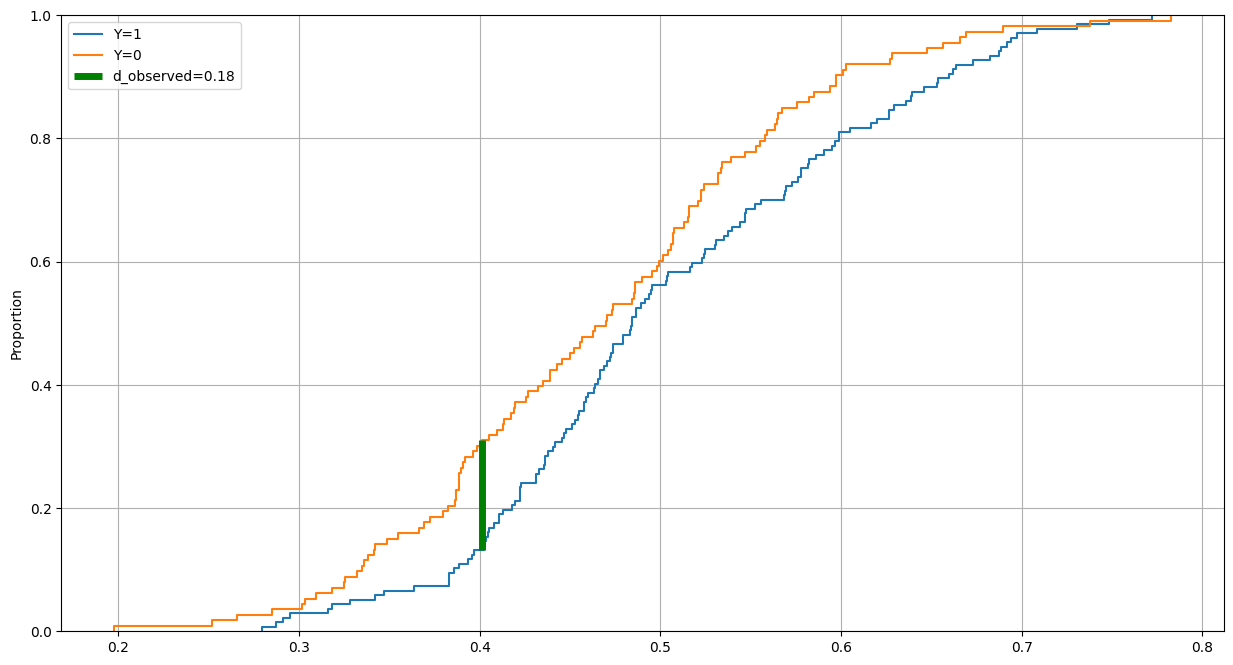

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

X, y = make_classification(random_state=0, n_samples=1000, class_sep=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)
y_pred_pos = y_pred[:, 1][y_test==1]
y_pred_neg = y_pred[:, 1][y_test==0]

ks_stat = stats.ks_2samp(y_pred_pos, y_pred_neg)

plt.figure(figsize=(15, 8))
ax_X = sns.ecdfplot(y_pred_pos, label='Y=1')
ax_Y = sns.ecdfplot(y_pred_neg, label='Y=0')

try:
  critical_y = sum(y_pred_pos<=ks_stat.statistic_location)/len(y_pred_pos)
except:
  critical_y = 0

try:
  critical_x = sum(y_pred_neg<=ks_stat.statistic_location)/len(y_pred_neg)
except:
  critical_x = 0

plt.vlines(ks_stat.statistic_location,
           ymin=min(critical_y, critical_x),
           ymax=max(critical_y, critical_x),
           color='g', label='d_observed='+str(round(ks_stat.statistic, 2)), linewidth=5)
plt.grid()
plt.legend()
plt.show()

How case with more separable classes

class_sep default=1.0
The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.

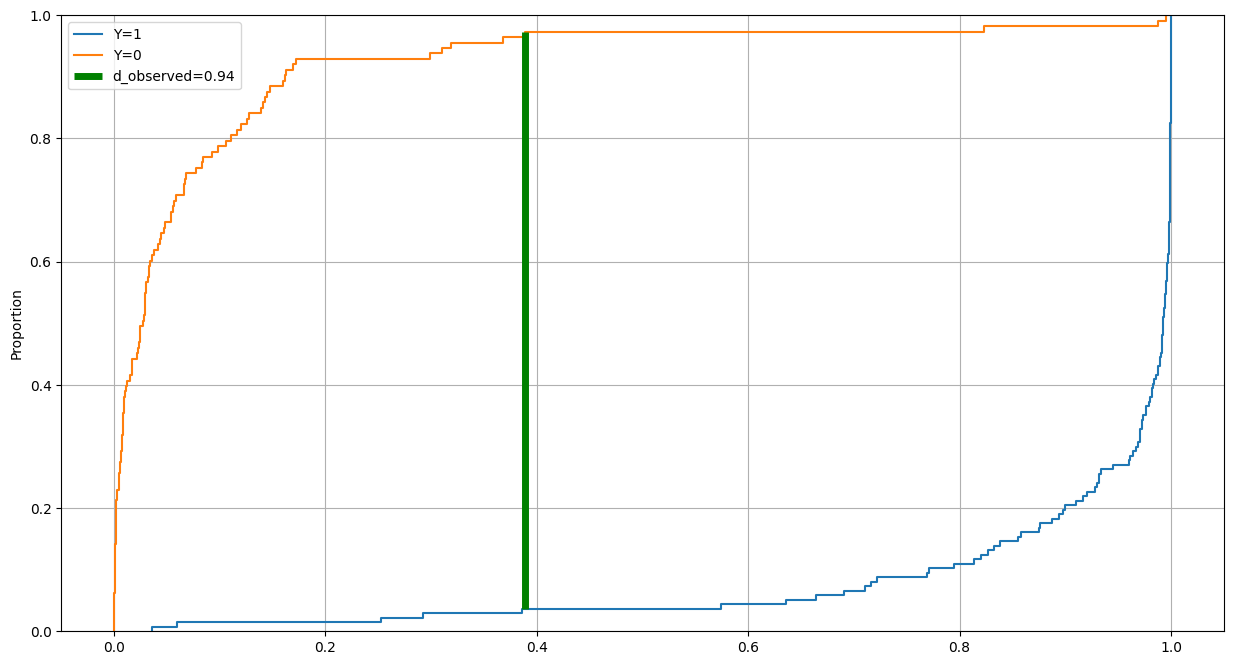

In [ ]:
X, y = make_classification(random_state=0, n_samples=1000, class_sep=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)
y_pred_pos = y_pred[:, 1][y_test==1]
y_pred_neg = y_pred[:, 1][y_test==0]

ks_stat = stats.ks_2samp(y_pred_pos, y_pred_neg)

plt.figure(figsize=(15, 8))
ax_X = sns.ecdfplot(y_pred_pos, label='Y=1')
ax_Y = sns.ecdfplot(y_pred_neg, label='Y=0')

try:
  critical_y = sum(y_pred_pos<=ks_stat.statistic_location)/len(y_pred_pos)
except:
  critical_y = 0

try:
  critical_x = sum(y_pred_neg<=ks_stat.statistic_location)/len(y_pred_neg)
except:
  critical_x = 0

plt.vlines(ks_stat.statistic_location,
           ymin=min(critical_y, critical_x),
           ymax=max(critical_y, critical_x),
           color='g', label='d_observed='+str(round(ks_stat.statistic, 2)), linewidth=5)
plt.grid()
plt.legend()
plt.show()

We see that distibution for class 0 and class 1 are more different that is shown by KS test as classes more separable